# Effects of point mutations on the PPI

## Representation of 3D structure of proteins

**PDB format:**
![](./PDB.png)

**Different types of representation:**
![](./PDB2.png)

## Single point mutations

Below is an example of single point mutation: Non-synonymous substitution of an amino acid with
small side-chain (Alanine in yellow) by an amino acid with larger side-chain (Tryptophan
in white). In this mutation both wild-type and mutant amino acids, Tryptophan (Trp
or W) and Alanine (Ala or A), have the hydrophobic (non-polar) side-chains. However,
the size of side-chain is dramatically changed and if it happens on the interaction surface
it can affect the geometrical properties of the binding site.

![](./pointmutation.png)

Effects of three amino acid substitutions on the geometrical and chemical properties of interaction surface of protein complex 1IAR. We use Alanine, Tryptophan, and Glutamic acid (An amino acid with a negatively charged side-chain). The interaction surface changes its shape on the region in which
these three single point mutations happen. Moreover, these mutations change the charge
distribution and electronegativity of the surface which are parts of chemical properties
of the interaction site. For example, mutation from Glutamic acid to Alanine affects
chemical properties and in turn geometry of the binding site. Point mutations on the interaction site can causes changes in the binding affinity.

![](./Alanine.png)
![](./Tryptophan.png)
![](./GlutamicAcid.png)

## Numerical measurement of the changes of binding affinity 

The most reliable methods to experimentally measure binding affinity between two proteins: 

- Isothermal Titration Calorimetry (ITC)
- Surface Plasmon Resonance (SPR)
- Spectroscopy (SP)
- Fluorescence (FL)
- Stopped-Flow Fluorimetry (SF)

Advantages:
- Good accuracy

Drawbacks:
- Expensive and hard processes 

**Solution: Computational approaches are proposed to numerically measure the binding affinity and its changes by exploiting the properties of protein complexes.**

Fortunately the size of experimental databases of binding affinity is large enough to develop machine learning models and predict unknown binding affinity for given two proteins. These approaches analyzes input
protein complexes from different perspectives and extract various descriptors. One of these approaches is Local Interaction Signal Analysis (LISA) [R. Raucci, et al., ‘18]. According to LISA the geometrical
distribution of favorable and non-favorable regions are principle determinants of the value
of binding affinity.

![](./distribution.png)

Furthermore, a catergory of numerical approaches are developed to predict the changes of the binding affinity, among these approaches are FLEX ddG [K. A. Barlow, et al., 2018] and iSEE [C. Geng, et al., 2019]. 


\begin{equation}
    \Delta\Delta G_{complex} = (G_{complex}^{MT} - G_{partner 1}^{MT} - G_{partner 2}^{MT}) - (G_{complex}^{WT} - G_{partner 1}^{WT} - G_{partner 2}^{WT})
    \label{eq:calculddg}
\end{equation}

Challenges:
- Mutagenesis and estimation of the structure of mutant protein complex.
- Identification of fine descriptors for prediction of changes of binding affinity.

## Conformational models of complex

Packages:

Mutagenesis
- Pymol Package
- Non-optimized side-chain orientation angles
- Fixed backbone

MODELLER
- Optimized side-chain orientation angles
- Fixed backbone
- Deterministic optimization process 

Rosetta Backrub
- Conformational sampling
- Simulation of near-native conformational fluctuations
- Flexible backbone
- For side-chains: Discrete combinatorial rotamer optimization (Repacking)
- For backbone and side-chain: continuous optimization of torsion angles

![](./backbone.png)

### Simulation of near-native conformational fluctuations

This is an example of near-native conformational fluctuations in which only the movement of backbone is shown. Complex: 5E9D.

![](./new_wt.gif)

## A Machine Learning Approach

![](./pipeline.png)

## Case study: Complex 1BRS

### Point mutations on 1BRS
From database SKEMPI v2 [J. Jankauskaitė, et al., 2018]

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

In [3]:
mutations = pd.read_csv('1RBS_mudations.csv', sep=';')
mutations[:15]

,Complex,Mutation,Region,Method
0,1BRS_A_D,DD35A,COR,ITC
1,1BRS_A_D,DD35A,COR,SPR
2,1BRS_A_D,DD39A,COR,ITC
3,1BRS_A_D,DD39A,COR,SPR
4,1BRS_A_D,"EA71A,DD35A","SUP,COR",ITC
5,1BRS_A_D,"EA71A,DD39A","SUP,COR",ITC
6,1BRS_A_D,EA71A,SUP,ITC
7,1BRS_A_D,EA71C,SUP,ITC
8,1BRS_A_D,"EA71F,DD35A","SUP,COR",ITC
9,1BRS_A_D,"EA71F,DD39A","SUP,COR",ITC


**EA71Y: Glutamic Acid (E) which is located on position 71 of chain A is replaced by Tyrosine (Y)**

In [4]:
HTML("""
    <video width="700" height="400" controls>
        <source src="EA71Y.mov">
    </video>
""")

**YD29F: Tyrosine (Y) which is located on position 29 of chain D is replaced by Phenylalanine (F)**

In [5]:
HTML("""
    <video width="700" height="400" controls>
        <source src="YD29F.mov">
    </video>
""")

In [6]:
features_mt = pd.read_csv('1BRS_features.csv', sep=';')
features_mt[:10]

,Unnamed: 0,#Pdb,Affinity_mut,Affinity_wt,Method,Mutation(s)_cleaned,iMutation_Location(s),score,V106,V46,...,fa_dun,fa_elec,fa_intra_rep,fa_rep,fa_sol,hbond_bb_sc,hbond_lr_bb,hbond_sc,hbond_sr_bb,pro_close
0,0,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-37.392028,22.734529,65,...,0,-14.584290,0.000000e+00,1.513075,31.330962,-6.881513,9.806911e-11,-4.818615,-4.110490e-11,-2.458034e-13
1,1,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-41.479745,29.370056,84,...,0,-18.466217,2.042810e-14,2.128390,36.751555,-7.798639,-2.842171e-11,-7.662563,-9.567458e-11,-1.742217e-13
2,2,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-32.221446,25.681126,100,...,0,-16.997991,4.440892e-16,1.668417,31.362962,-4.863814,4.533263e-12,-6.452159,1.352873e-11,5.129785e-13
3,3,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-34.218212,17.109655,43,...,0,-17.429030,-2.442491e-14,3.349478,35.340195,-5.736393,-7.325696e-12,-6.270114,4.133938e-11,1.644240e-13
4,4,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-40.002270,35.231729,127,...,0,-11.282555,1.643130e-14,2.109373,31.870106,-4.113794,-5.879741e-11,-4.344624,-1.236131e-10,-3.168021e-13
5,5,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-37.382208,19.726724,93,...,0,-14.458624,1.421085e-14,2.395334,32.678929,-5.381401,-4.822098e-11,-6.376751,2.201332e-10,1.242340e-12
6,6,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-35.716695,21.512385,73,...,0,-13.554698,3.907985e-14,2.297274,31.204003,-4.171211,-8.792966e-12,-5.514953,-2.501110e-12,8.615331e-13
7,7,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-35.638698,20.364375,90,...,0,-12.544474,-2.220446e-15,1.925979,31.691630,-5.339372,-4.988010e-12,-5.801806,-1.359481e-10,8.776313e-14
8,8,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-36.422295,17.993875,85,...,0,-17.583214,8.437695e-15,2.653895,37.434678,-7.270043,-2.137313e-11,-7.812436,-3.205969e-11,2.871314e-13
9,9,1BRS_A_D,-14.595226,-19.098395,ITC,DD35A,COR,-39.976612,25.388679,67,...,0,-14.494545,-1.820766e-14,1.128513,30.227993,-5.908867,-7.850787e-11,-5.013727,-2.022915e-11,-1.971756e-13


In [7]:
def DoBoxPlot(pdb_name, df): 
    df = df[df["#Pdb"] == pdb_name]
    data = []
    expr_b_aff = []
    est_res = "score"
    mutations = "-"
    data_tmp = []
    for index, row in df.iterrows():
        if row["Mutation(s)_cleaned"] != mutations:
            expr_b_aff.append(float(row["Affinity_mut"]))
            if data_tmp != []:
                data.append(data_tmp)

            data_tmp = []
            mutations = row["Mutation(s)_cleaned"]
        data_tmp.append(row[est_res])
    data.append(data_tmp)
    
    pred_b_aff = []
    for data_tmp in data:
        pred_b_aff.append(np.median(data_tmp))
    
    #Boxplot
    plt.figure(figsize=(10,7))
    boxplotElements = plt.boxplot(data,
                                   sym = 'go', whis = 1.2,
                                   widths = [0.8]*len(data), positions = range(len(data)),
                                   patch_artist = True)
    
    for element in boxplotElements['medians']:
        element.set_color('red')
        element.set_linewidth(2)
    for element in boxplotElements['boxes']:
        element.set_edgecolor('navy')
        element.set_facecolor((0,0,0,0))
        element.set_linewidth(2)
        element.set_fill(False)
    for element in boxplotElements['whiskers']:
        element.set_color('purple')
        element.set_linewidth(2)
    for element in boxplotElements['caps']:
        element.set_color('black')
        
    plt.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey', alpha=0.5)
    plt.gca().set_axisbelow(True)
    
    plt.plot(range(len(data)),expr_b_aff,'b*-', label = 'Experimental')
    plt.plot(range(len(data)),pred_b_aff,'r-', label = 'Prediction')
    
    top = -4
    for tick in range(len(data)):
        plt.text(tick, top - (top*0.05), len(data[tick]),
             horizontalalignment='center', size='x-small', weight='bold',
             color='k')     
    
    plt.ylim(-50, 0)
    plt.title(pdb_name + ': Distribution of estimated $\Delta$G ')
    plt.xlabel("Mutations")
    plt.ylabel('$\Delta$G (kcal/mol)')
    plt.tight_layout()
    plt.legend()

/home/mohseni/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


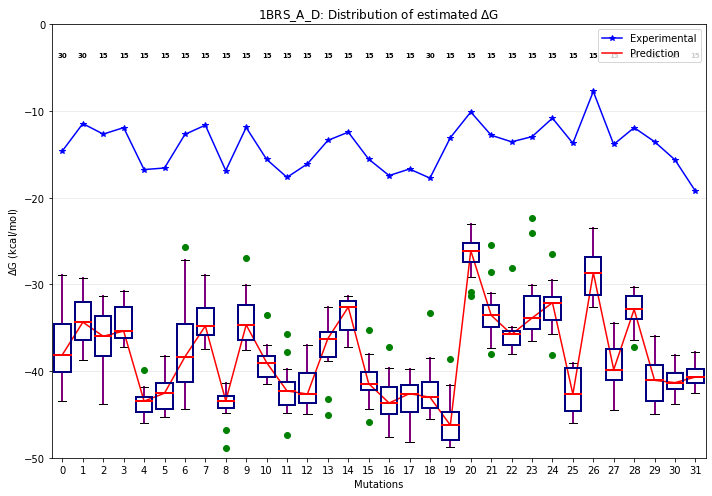

In [8]:
comp_name = '1BRS_A_D'
DoBoxPlot(comp_name, features_mt)

Different types of analysis:
- Changes of the binding affinity with respect to the region of point mutation (CORE, SUP, RIM introduced by [E. D. Levy, 2010]).
- Classification of changes of binding affinity based on favorable, deleterious, and neutral mutations.

This notebook is designed by Yasser MOHSENI BEHBAHANI, LCQB, Sorbonne Université
<img src='logo.svg.png'>